Kaggle competition
#### House Prices: Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## The Data

We will be using data from a Kaggle dataset:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

#### File descriptions
* train.csv - the training set  
* test.csv - the test set  
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here  
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms  

#### Feature Columns
    
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.  

* MSSubClass: The building class  
* MSZoning: The general zoning classification  
* LotFrontage: Linear feet of street connected to property  
* LotArea: Lot size in square feet  
* Street: Type of road access  
* Alley: Type of alley access  
* LotShape: General shape of property  
* LandContour: Flatness of the property  
* Utilities: Type of utilities available  
* LotConfig: Lot configuration  
* LandSlope: Slope of property  
* Neighborhood: Physical locations within Ames city limits  
* Condition1: Proximity to main road or railroad  
* Condition2: Proximity to main road or railroad (if a second is present)  
* BldgType: Type of dwelling  
* HouseStyle: Style of dwelling  
* OverallQual: Overall material and finish quality  
* OverallCond: Overall condition rating  
* YearBuilt: Original construction date  
* YearRemodAdd: Remodel date  
* RoofStyle: Type of roof  
* RoofMatl: Roof material  
* Exterior1st: Exterior covering on house  
* Exterior2nd: Exterior covering on house (if more than one material)  
* MasVnrType: Masonry veneer type  
* MasVnrArea: Masonry veneer area in square feet  
* ExterQual: Exterior material quality  
* ExterCond: Present condition of the material on the exterior  
* Foundation: Type of foundation  
* BsmtQual: Height of the basement  
* BsmtCond: General condition of the basement  
* BsmtExposure: Walkout or garden level basement walls  
* BsmtFinType1: Quality of basement finished area  
* BsmtFinSF1: Type 1 finished square feet  
* BsmtFinType2: Quality of second finished area (if present)  
* BsmtFinSF2: Type 2 finished square feet  
* BsmtUnfSF: Unfinished square feet of basement area  
* TotalBsmtSF: Total square feet of basement area  
* Heating: Type of heating  
* HeatingQC: Heating quality and condition  
* CentralAir: Central air conditioning  
* Electrical: Electrical system  
* 1stFlrSF: First Floor square feet  
* 2ndFlrSF: Second floor square feet  
* LowQualFinSF: Low quality finished square feet (all floors)  
* GrLivArea: Above grade (ground) living area square feet  
* BsmtFullBath: Basement full bathrooms  
* BsmtHalfBath: Basement half bathrooms  
* FullBath: Full bathrooms above grade  
* HalfBath: Half baths above grade  
* Bedroom: Number of bedrooms above basement level  
* Kitchen: Number of kitchens   
* KitchenQual: Kitchen quality  
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
* Functional: Home functionality rating  
* Fireplaces: Number of fireplaces  
* FireplaceQu: Fireplace quality  
* GarageType: Garage location  
* GarageYrBlt: Year garage was built  
* GarageFinish: Interior finish of the garage  
* GarageCars: Size of garage in car capacity  
* GarageArea: Size of garage in square feet  
* GarageQual: Garage quality  
* GarageCond: Garage condition   
* PavedDrive: Paved driveway  
* WoodDeckSF: Wood deck area in square feet  
* OpenPorchSF: Open porch area in square feet  
* EnclosedPorch: Enclosed porch area in square feet  
* 3SsnPorch: Three season porch area in square feet  
* ScreenPorch: Screen porch area in square feet  
* PoolArea: Pool area in square feet   
* PoolQC: Pool quality  
* Fence: Fence quality  
* MiscFeature: Miscellaneous feature not covered in other categories  
* MiscVal: $Value of miscellaneous feature  
* MoSold: Month Sold  
* YrSold: Year Sold  
* SaleType: Type of sale  
* SaleCondition: Condition of sale  

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Correlation

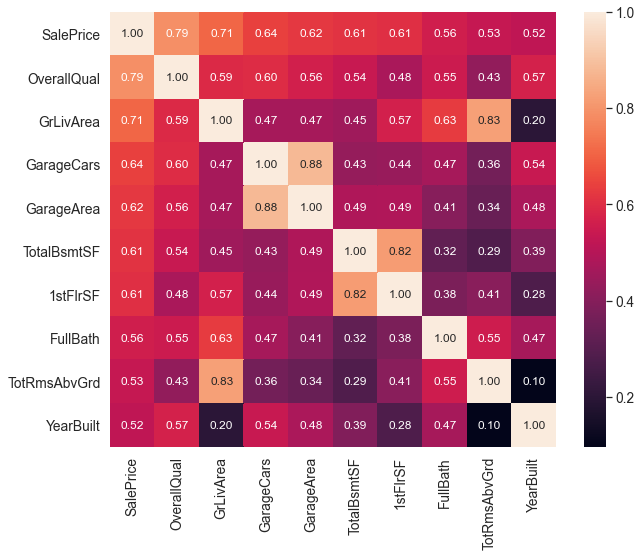

In [5]:
corrmat = df.corr()
plt.figure(figsize=(10,8))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # columns that are highest correlated to SalePrice
cm = np.corrcoef(df[cols].values.T) # correlation coefficient of columns highest correlated with SalePrice
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Combining values

#### Combine house square footage to one feature, consisting of: 
TotalBsmtSF: Total square feet of basement area  
1stFlrSF: First Floor square fee  
2ndFlrSF: Second floor square feet  
GrLivArea: Above grade (ground) living area square feet

In [6]:
#Add a new column totalSF
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea']

#### Space for cars:  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
Because they both represent the area for cars, though in different ways, we will remove one. We will remove GarageArea because GarageCars has a higher correlation with SalePrice as seen on above heatmap. 

#### Combine the number of bathrooms: 
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms  
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade  

In [7]:
#adding a new column TotalBaths
df['TotalBaths'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']

#### Remodeling
Find houses where the year built and remodeling is the same, which means no remodeling actually happened.  
Create a new feature for how old was the house(how many years from being built or remodeled) when sold.   
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
YrSold: Year Sold

In [8]:
# Add new features
df['Remodeled'] = np.where(df['YearRemodAdd'] == df['YearBuilt'], 'No', 'Yes') # No for houses that were never remodeled
df['Age when Sold'] = df['YrSold'] - df['YearRemodAdd'] # how many years after being remodeled is the house sold

### Drop features that were combined

In [9]:
basement_cols = [col for col in df.columns if 'Bsmt' in col]

In [10]:
remove_cols = basement_cols+['1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath', 'GarageArea', 'YearRemodAdd','YearBuilt','YrSold']

In [11]:
remove_cols 

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'GarageArea',
 'YearRemodAdd',
 'YearBuilt',
 'YrSold']

In [12]:
df.drop(remove_cols, axis=1, inplace=True)

# Dealing with missing values

### Remove columns with more than 50% of missing data

In [13]:
"""
A function to find columns where there is more than 50% of data missing. 
We will compare the number of available data to all rows in the column to find the percentage of missing data. 
We'll return a list of column names where available data is lower than 50%.
"""
def missingvalues(df):
    missing_values = []
    for column in df:
        notnull = sum(df[column].notnull())
        l = len(df)
        available_data = notnull/l*100
        if available_data < 50: 
            missing_values.append(column)
    return missing_values

In [14]:
cols_miss = missingvalues(df)
# Columns missing more than 50% of data
print(cols_miss)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [15]:
# Delete found columns
df = df.drop(cols_miss, axis=1)

### Check for low variance

In [16]:
"""
A function to find low variance data. 
Checks if the most recurrent value of the feature is repeated in almost all instances. 
x is percentage of uniform values. 
Return a list of column names where data is same for x%. 
"""
def low_variance(df, x):
    low_var = []
    for i in df.columns:
        counts = df[i].value_counts()
        top = counts.iloc[0]
        if top / len(df) * 100 > x:
            low_var.append(i)
    return low_var

In [17]:
# 90% of data is the same
cols_low = low_variance(df, 90)
print(cols_low)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [18]:
# Drop columns with low variance
df = df.drop(cols_low, axis=1)

### Decide what to do with rest of missing values

In [19]:
# NaN values
null_values = df.isnull().sum().sort_values(ascending=False).head(10)
print(null_values)

FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageType       81
GarageQual       81
GarageFinish     81
MasVnrType        8
MasVnrArea        8
Exterior2nd       0
Exterior1st       0
dtype: int64


In [20]:
# numerical data types i.e int64/float, should be imputed or filled
[col for col in null_values.index if df[col].dtype not in ['object']]

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [21]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace = True)
df['MasVnrArea'].fillna(0, inplace = True)
df['MasVnrType'].fillna('NA', inplace = True)
df.drop('FireplaceQu', axis=1, inplace=True)
df.drop('BedroomAbvGr', axis=1, inplace=True) 
df.drop('Id', axis=1, inplace=True)

df['GarageQual'].fillna('NA', inplace = True)
df['GarageFinish'].fillna('NA', inplace = True)
df['GarageType'].fillna('NA', inplace = True)

In [22]:
# categorical
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['MoSold'] = df['MoSold'].astype('category')
df['GarageYrBlt'] = df['GarageYrBlt'].astype('category') # was imputed now turned to a category

In [23]:
# turning object columns into category columns
# it's a good practice to typecast categorical features to a category dtype because 
# they make the operations on such columns much faster than the object dtype.
for i in df.select_dtypes(include='object').columns.to_list():
    df[i] = df[i].astype('category')

In [24]:
# list with categorical variables
cat_cols = df.select_dtypes(include='category').columns.to_list()
print(len(cat_cols))
cat_cols

26


['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'MoSold',
 'SaleType',
 'SaleCondition',
 'Remodeled']

/Users/helenahook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


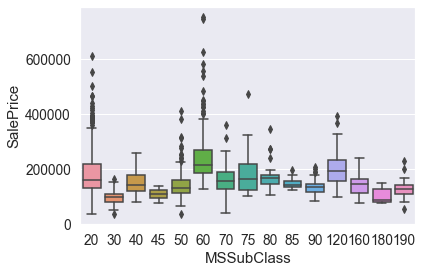

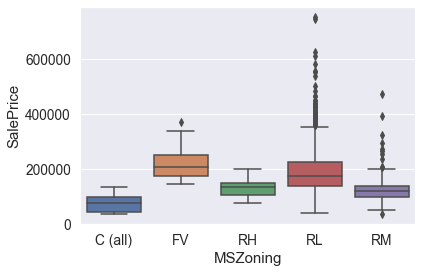

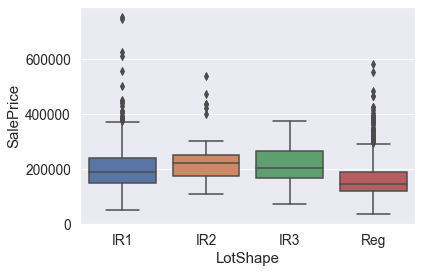

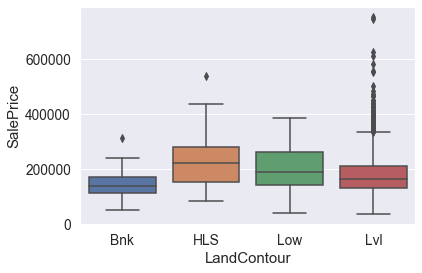

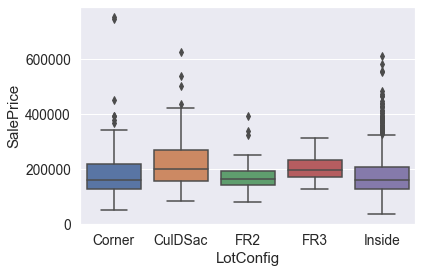

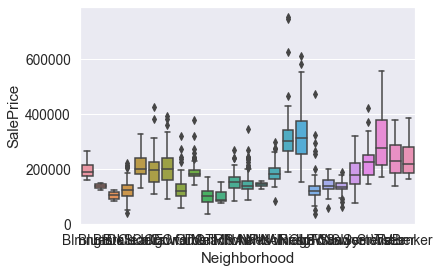

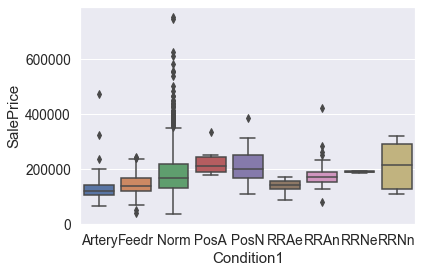

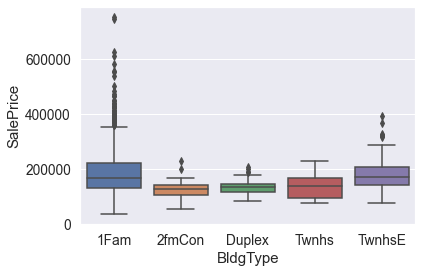

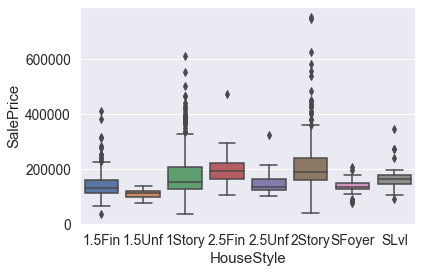

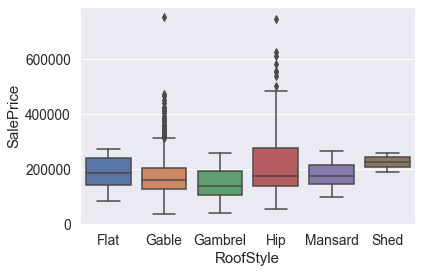

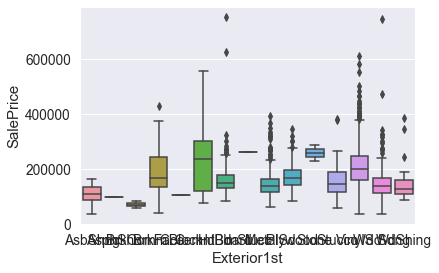

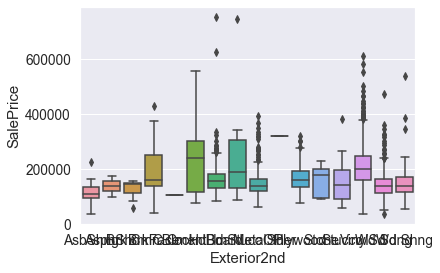

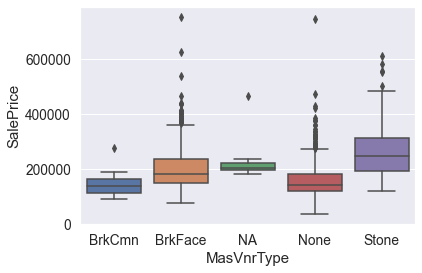

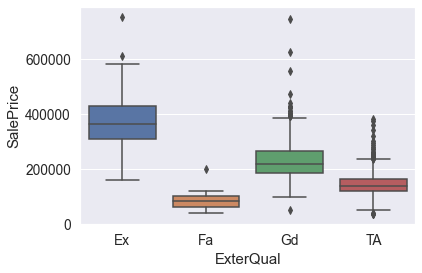

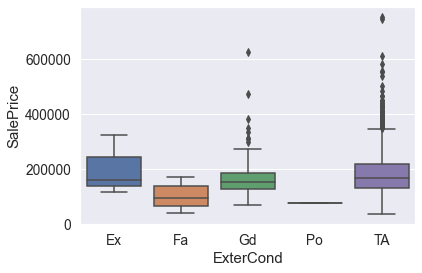

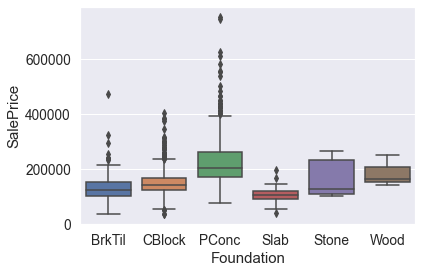

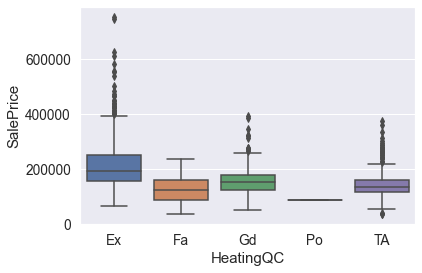

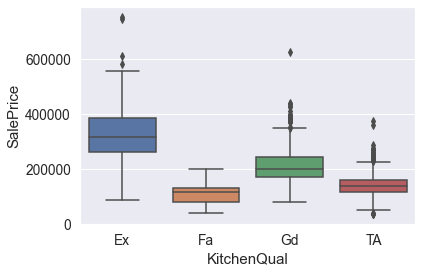

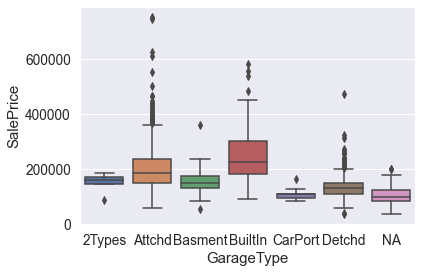

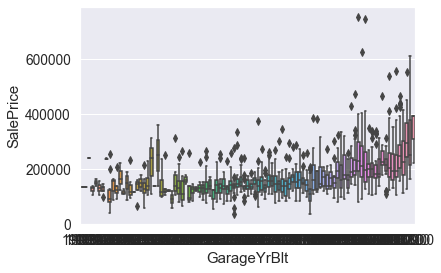

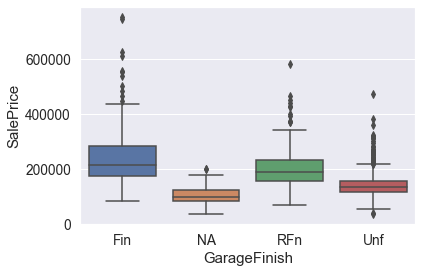

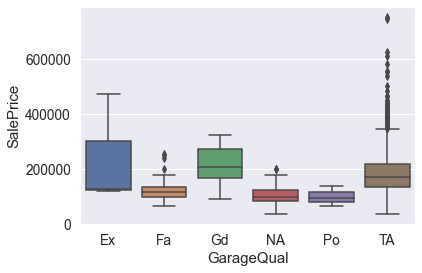

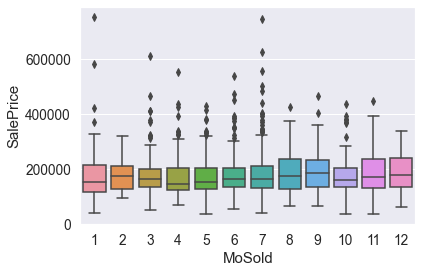

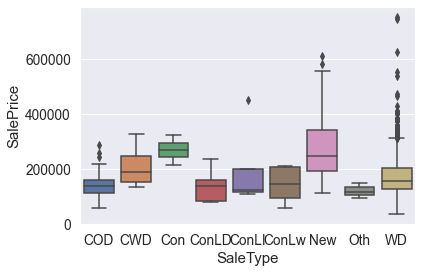

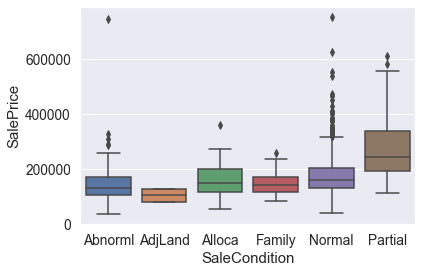

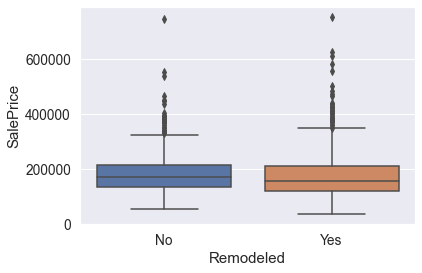

In [25]:
# categorical variables vs. SalePrice
for cols in cat_cols:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = df)

In [26]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

### Check correlation with SalePrice

In [25]:
# Variables correlation with Sale Price
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
TotalSF          0.777123
GarageCars       0.640409
TotalBaths       0.631731
TotRmsAbvGrd     0.533723
MasVnrArea       0.472614
Fireplaces       0.466929
LotFrontage      0.334771
WoodDeckSF       0.324413
OpenPorchSF      0.315856
LotArea          0.263843
OverallCond     -0.077856
EnclosedPorch   -0.128578
Age when Sold   -0.509079
Name: SalePrice, dtype: float64

In [26]:
# features to remove based on low correlation to saleprice
df.drop(['EnclosedPorch', 'OverallCond'], axis=1, inplace=True)

## Outliers

<AxesSubplot:>

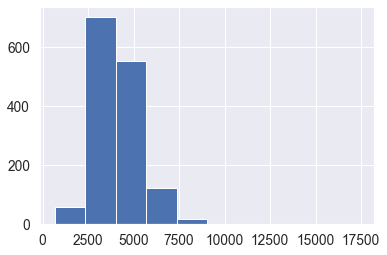

In [27]:
df['TotalSF'].hist()

In [28]:
df[df['TotalSF']>10000]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBaths,Remodeled,Age when Sold
523,60,RL,130.0,40094,IR1,Bnk,Inside,Edwards,PosN,1Fam,...,208,406,10,New,Partial,184750,12490,4.5,Yes,-1
691,60,RL,104.0,21535,IR1,Lvl,Corner,NoRidge,Norm,1Fam,...,382,50,1,WD,Normal,755000,11076,4.0,Yes,12
1182,60,RL,160.0,15623,IR1,Lvl,Corner,NoRidge,Norm,1Fam,...,171,78,7,WD,Abnorml,745000,11348,4.5,No,11
1298,60,RL,313.0,63887,IR3,Bnk,Corner,Edwards,Feedr,1Fam,...,214,292,1,New,Partial,160000,17394,4.5,No,0


<AxesSubplot:>

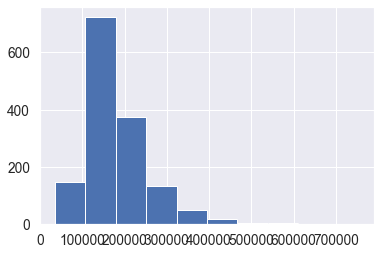

In [29]:
df['SalePrice'].hist()

In [30]:
df[df['SalePrice']>500000]['SalePrice']

178     501837
440     555000
691     755000
769     538000
803     582933
898     611657
1046    556581
1169    625000
1182    745000
Name: SalePrice, dtype: int64

In [31]:
# Seems that removing a house with TotalSF > 10000 is a good idea
df.drop(df[df['TotalSF']>10000].index, inplace = True)
# Same for SalePrice > 500000
df.drop(df[df['SalePrice']>500000].index, inplace = True)

### Output clean training data

In [32]:
df.to_csv('data/clean_train.csv', index = False)
print("Clean training data was saved!")

Clean training data was saved!


# Feature engineering on the test set

In [33]:
test = pd.read_csv('data/test.csv')
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [34]:
test.shape

(1459, 80)

### Same changes as with training data

In [35]:
#Add a new column totalSF
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF'] + test['GrLivArea']
#adding a new column TotalBaths
test['TotalBaths'] = test['FullBath'] + 0.5*test['HalfBath'] + test['BsmtFullBath'] + 0.5*test['BsmtHalfBath']
# Add new features
test['Remodeled'] = np.where(test['YearRemodAdd'] == test['YearBuilt'], 'No', 'Yes') # No for houses that were never remodeled
test['Age when Sold'] = test['YrSold'] - test['YearRemodAdd'] # how many years after being remodeled is the house sold

In [36]:
basement_cols = [col for col in test.columns if 'Bsmt' in col]
remove_cols = basement_cols+['1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath', 'GarageArea', 'YearRemodAdd','YearBuilt','YrSold']
print(remove_cols)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'GarageArea', 'YearRemodAdd', 'YearBuilt', 'YrSold']


In [37]:
test.drop(remove_cols, axis=1, inplace=True)

In [38]:
print(cols_miss)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [39]:
# Delete missing data columns
test = test.drop(cols_miss, axis=1)

In [40]:
print(cols_low)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [41]:
# Drop columns with low variance
test = test.drop(cols_low, axis=1)

### Rest of missing values

In [42]:
# NaN values
null_values = test.isnull().sum().sort_values(ascending=False).head(17)
print(null_values)

FireplaceQu     730
LotFrontage     227
GarageFinish     78
GarageQual       78
GarageYrBlt      78
GarageType       76
MasVnrType       16
MasVnrArea       15
MSZoning          4
TotalBaths        2
Exterior2nd       1
KitchenQual       1
Exterior1st       1
GarageCars        1
SaleType          1
TotalSF           1
OverallCond       0
dtype: int64


In [43]:
# numerical data types i.e int64/float, should be imputed or removed
[col for col in null_values.index if test[col].dtype not in ['object']]

['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'TotalBaths',
 'GarageCars',
 'TotalSF',
 'OverallCond']

In [44]:
test['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].median(), inplace = True)
test['MasVnrArea'].fillna(0, inplace = True)
test['MasVnrType'].fillna('NA', inplace = True)
test.drop('FireplaceQu', axis=1, inplace=True)
test.drop('BedroomAbvGr', axis=1, inplace=True) 
test['GarageQual'].fillna('NA', inplace = True)
test['GarageFinish'].fillna('NA', inplace = True)
test['GarageType'].fillna('NA', inplace = True)

In [45]:
# Filling missing values relative to test set
test['MSZoning'].fillna(test['MSZoning'].value_counts().index[0], inplace = True)
test['TotalBaths'].fillna(round(float(test['TotalBaths'].mean()),1), inplace = True)
test['GarageCars'].fillna(round(float(test['GarageCars'].mean()),1), inplace = True)
test['KitchenQual'].dropna(inplace = True)
test['Exterior1st'].dropna(inplace = True)
test['Exterior2nd'].dropna(inplace = True)
test['SaleType'].dropna(inplace = True)
test['TotalSF'].dropna(inplace = True)

In [46]:
# Double check for rows with missing values
is_NaN = test.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = test[row_has_NaN]
rows_with_NaN

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,TotalSF,TotalBaths,Remodeled,Age when Sold
95,1556,50,RL,72.0,10632,IR1,Lvl,Inside,ClearCr,Norm,...,0,0,248,1,COD,Normal,3137.0,1.5,Yes,60
660,2121,20,RM,99.0,5940,IR1,Lvl,FR3,BrkSide,Feedr,...,0,0,0,4,ConLD,Abnorml,NaN,2.2,Yes,58
691,2152,30,RL,85.0,19550,Reg,Lvl,Inside,Edwards,Norm,...,0,39,0,1,WD,Normal,4616.0,2.0,Yes,1
1029,2490,20,RL,85.0,13770,Reg,Lvl,Corner,Sawyer,Feedr,...,0,0,0,10,NaN,Normal,3510.0,2.0,Yes,9


In [47]:
# dropna did not work on 4 rows, removing them manually
test.drop(test[test['Id']==1556].index, inplace = True)
test.drop(test[test['Id']==2121].index, inplace = True)
test.drop(test[test['Id']==2152].index, inplace = True)
test.drop(test[test['Id']==2490].index, inplace = True)

In [48]:
test.drop('Id', axis=1, inplace=True)

In [49]:
# categorical
test['MSSubClass'] = test['MSSubClass'].astype('category')
test['MoSold'] = test['MoSold'].astype('category')
test['GarageYrBlt'] = test['GarageYrBlt'].astype('category') # was imputed now turned to a category

In [50]:
# turning object columns into category columns
# it's a good practice to typecast categorical features to a category dtype because 
# they make the operations on such columns much faster than the object dtype.
for i in test.select_dtypes(include='object').columns.to_list():
    test[i] = test[i].astype('category')

In [51]:
# list with categorical variables
cat_cols2 = test.select_dtypes(include='category').columns.to_list()
print(len(cat_cols2))
print(cat_cols2)

26
['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'MoSold', 'SaleType', 'SaleCondition', 'Remodeled']


In [52]:
# features to remove based on low correlation to saleprice in train set
test.drop(['EnclosedPorch', 'OverallCond'], axis=1, inplace=True)

### Output clean test data

In [53]:
test.to_csv('data/clean_test.csv', index = False)
print("Clean test data was saved!")

Clean test data was saved!


# Encoding categorical features using dummy variables

In [54]:
print(df.shape) #training data
print(test.shape) #test data

(1449, 39)
(1455, 38)


In [55]:
# number of categorical variables
print(len(cat_cols))
print(len(cat_cols2))

26
26


### Combine train and test set to do encoding

In [56]:
#Add new column Status to both sets to differentiate between the two
train = df.copy()
train.drop(labels = 'SalePrice', axis = 1, inplace = True)
train['Status'] = 'Train Set' # adding a column Status to differentiate between Train and Test in the combined set
test1 = test.copy()
test1['Status'] = 'Test Set'
combined = train
combined = combined.append(test1)

In [57]:
print(train.shape)
print(test1.shape)
print(combined.shape)

(1449, 39)
(1455, 39)
(2904, 39)


In [58]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     2904 non-null   int64   
 1   MSZoning       2904 non-null   category
 2   LotFrontage    2904 non-null   float64 
 3   LotArea        2904 non-null   int64   
 4   LotShape       2904 non-null   category
 5   LandContour    2904 non-null   category
 6   LotConfig      2904 non-null   category
 7   Neighborhood   2904 non-null   category
 8   Condition1     2904 non-null   category
 9   BldgType       2904 non-null   category
 10  HouseStyle     2904 non-null   object  
 11  OverallQual    2904 non-null   int64   
 12  RoofStyle      2904 non-null   category
 13  Exterior1st    2904 non-null   object  
 14  Exterior2nd    2904 non-null   object  
 15  MasVnrType     2904 non-null   category
 16  MasVnrArea     2904 non-null   float64 
 17  ExterQual      2904 non-null   ca

In [59]:
# Merging dataframes changed some of the datatypes, we will redo object data types to category
for i in combined.select_dtypes(include='object').columns.to_list():
    combined[i] = combined[i].astype('category')
    print(i)

HouseStyle
Exterior1st
Exterior2nd
GarageQual
Status


In [60]:
# extra checks
list(set(combined.columns.to_list()) ^ set(df.columns.to_list()))

['Status', 'SalePrice']

In [61]:
combined['Status'].value_counts()

Test Set     1455
Train Set    1449
Name: Status, dtype: int64

### Start encoding

In [62]:
# separate Status from features
X = combined.copy()
St = X['Status']
X.drop('Status', axis = 1, inplace = True)

In [63]:
combined['Status'].value_counts() # double check it matches with St values

Test Set     1455
Train Set    1449
Name: Status, dtype: int64

In [64]:
St.value_counts()

Test Set     1455
Train Set    1449
Name: Status, dtype: int64

In [65]:
# Separate categorical and numerical variables by their data type
X_cat = X.select_dtypes(include=['category'])
X_num = X.select_dtypes(exclude=['category'])

In [66]:
X_encoded = pd.get_dummies(X_cat)

In [67]:
print("X_encoded = {}\nX_num = {}\nSt = {}".format(X_encoded.shape,X_num.shape, St.shape))

X_encoded = (2904, 177)
X_num = (2904, 14)
St = (2904,)


In [68]:
# Combine a new data frame with encoded variables, numerical variables and status
frames = [X_encoded, X_num, St]
combined_enc = pd.concat(frames, axis = 1)

In [69]:
print('Combined set is {}'.format(combined_enc.shape))

Combined set is (2904, 192)


### Separate encoded train end test set

In [77]:
train_enc = combined_enc[combined_enc['Status']=='Train Set']
test_enc = combined_enc[combined_enc['Status']=='Test Set']

In [78]:
print('Encoded Train set is {}\nEncoded Test set is {}'.format(train_enc.shape,test_enc.shape))

Encoded Train set is (1449, 192)
Encoded Test set is (1455, 192)


In [79]:
# adding SalePrice to Encoded Train set
fr = [train_enc, df['SalePrice']]
train_enc = pd.concat(fr, axis = 1)

In [80]:
print('New shape of Train set is {}'.format(train_enc.shape))

New shape of Train set is (1449, 193)


In [81]:
print('New shape of Test set is {}'.format(test_enc.shape))

New shape of Test set is (1455, 192)


In [82]:
train_enc.drop('Status', axis=1, inplace=True)
test_enc.drop('Status', axis=1, inplace=True)

### Output encoded data sets

In [83]:
train_enc.to_csv('data/train_enc.csv', index = False)
print("Encoded train data was saved!")

Encoded train data was saved!


In [84]:
test_enc.to_csv('data/test_enc.csv', index = False)
print("Encoded test data was saved!")

Encoded test data was saved!
